# Mecánica de Medios Continuos
## Por Jorge I. Zuluaga
### Cuadernos de exploración numérica
### **CFD: flujo estacionario 1D**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Propiedades básicas

In [ ]:
#Propiedades del fluído 
nu=1e-3 #Glicerina, [m^2/s]
rho=1260 #[kg/m^3]

#Dimensiones del Canal
U=0.1 #[m/s]
a=0.2 #H = 2a, [m]
H=2*a
L=4 #[m]
h=H/40 #[m]
print(f"División del canal: h = {h} m")

División del canal: h = 0.01 m


### Unidades hidrodinámicas

In [ ]:
#Unidades hidrodinámicas
UL=nu/U
UT=UL/U
#rho = 1 UM/UL^3
UM=rho*UL**3

#Derivadas
UV=UL/UT
UP=UM*UL/UT**2/UL**2 #Unidad de presión
UNU=UL**2/UT
URHO=UM/UL**3
print(f"Unidades del problema: UL = {UL} m, UT = {UT} s, UM = {UM:e} kg")
print(f"Unidades presión: UV = {UV} m/s, URHO = {URHO} kg/m^3, UNU = {UNU} m^2/s, UP = {UP:e} Pa")

#Dimensiones en unidades hidrodinámicas
U/=UV
nu/=UNU
rho/=URHO
a/=UL
h/=UL
H/=UL
L/=UL

print(f"Propiedades: rho = {rho} u.h., nu = {nu} u.h., U = {U} u.h.")
print(f"Dimensiones: a = {a} u.h., H = {H} u.h., L = {L} u.h., h = {h} u.h.")

#Gradiente de presión
G = -12*nu*rho*U/a**2
print(f"Gradiente de presión: G = {G}")

Unidades del problema: UL = 0.9999999999999998 m, UT = 0.9999999999999998 s, UM = 1.000000e+00 kg
Unidades presión: UV = 1.0 m/s, URHO = 1.0 kg/m^3, UNU = 0.9999999999999998 m^2/s, UP = 1.000000e+00 Pa
Propiedades: rho = 1.0 u.h., nu = 1.0 u.h., U = 1.0 u.h.
Dimensiones: a = 20.000000000000004 u.h., H = 40.00000000000001 u.h., L = 400.0000000000001 u.h., h = 1.0000000000000002 u.h.
Gradiente de presión: G = -0.02999999999999999


### Discretización

In [ ]:
#Tamaño de la malla
Nx=int(L/h)
Ny=int(H/h)
print(f"Tamaño de la malla: Nx = {Nx}, Ny = {Ny}")

#Parametro SOR
omega=0.5

Tamaño de la malla: Nx = 400, Ny = 40


In [ ]:
#Matrices de los campos:
vx=np.zeros((Nx,Ny))
vy=np.zeros((Nx,Ny))
P=np.zeros((Nx,Ny))

q=open("twopr_py2.dat","w")
iter=0
err=1.0
while (err>0.1*omega) and (iter<=100):

  err=0.0
  #Condiciones de frontera
  vx[:,-1],vy[:,-1]=0,0 #Borde superior
  vx[:,0],vy[:,0]=0,0 #Borde inferior
  vx[0,:],vy[0,:]=U,0 #Entrada
  vx[-1,:],vy[-1,:]=vx[-2,:],vy[-2,:] #Salida

  #Iteración      
  for i in range(1,Nx-1):
    for j in range(1,Ny-1):
      #Condición de incompresibilidad
      vx[i+1][j] = vx[i-1][j] - vy[i][j+1] + vy[i][j-1] 
      #Ecuación N-S
      #Componente x
      r1 = omega*(vx[i+1][j] + vx[i-1][j] + vx[i][j+1] + vx[i][j-1] - 4*vx[i][j] 
                     - 0.5*vx[i][j]*(vx[i+1][j]-vx[i-1][j])
                     - 0.5*vy[i][j]*(vx[i][j+1]-vx[i][j-1])-0.5*h**2*G)/4.;
      vx[i][j] +=  r1;
      #Componente y
      r2 = omega*(vy[i+1][j] + vy[i-1][j] + vy[i][j+1] + vy[i][j-1]-
            4*vy[i][j] - 0.5*vx[i][j]*(vy[i+1][j] - vy[i-1][j])-
            0.5*vy[i][j]*(vy[i][j+1] - vy[i][j-1]))/4.0;
      vy[i][j] +=  r2;
      
      #Eror
      err=max(err,abs(r1))
      
  print(f"Paso {iter}, error = {err}")
  iter+=1

Paso 0, error = 0.32632653061224487
Paso 1, error = 0.2765757106413994
Paso 2, error = 0.24581828901043842
Paso 3, error = 0.2264599550521487
Paso 4, error = 0.2142653751932085
Paso 5, error = 0.20632227607799
Paso 6, error = 0.20090253296632907
Paso 7, error = 0.19746010869084787
Paso 8, error = 0.1951872637224578
Paso 9, error = 0.19367318963674454
Paso 10, error = 0.19265971087627673
Paso 11, error = 0.19197850877474024
Paso 12, error = 0.19151900291113796
Paso 13, error = 0.19120807217995803
Paso 14, error = 0.19099709679140373
Paso 15, error = 0.19085359392170068
Paso 16, error = 0.19075577190281404
Paso 17, error = 0.19068895847135905
Paso 18, error = 0.19064324334562296
Paso 19, error = 0.19061191378197492
Paso 20, error = 0.19059041143910957
Paso 21, error = 0.19057563394555224
Paso 22, error = 0.19056546554986895
Paso 23, error = 0.19055846069104562
Paso 24, error = 0.190553630048048
Paso 25, error = 0.19055029550425448
Paso 26, error = 0.1905479915991026
Paso 27, error = 0.19

Comparemos con el perfil teórico

In [ ]:
ys=np.linspace(-a,a,Ny)
vxs=-G/(8*nu*rho)*(a**2-ys**2)

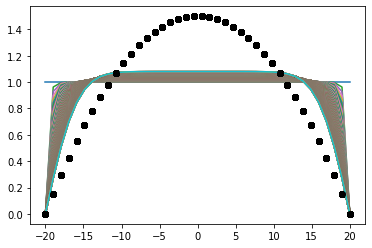

In [ ]:
fig,ax=plt.subplots(1,1)
for i in range(Nx):
  ax.plot(ys,vx[i,:]);
  ax.plot(ys,vxs,'ko');

## Gráfico del canal

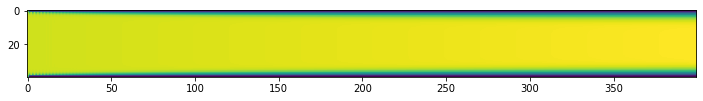

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(vx.transpose())

## Programa en C

In [1]:
%%file canal.c
#include <stdlib.h>
#include <math.h>
#include <stdio.h>

#define Nx 400
#define Ny 40

int main(void)
{
//Matrices de los campos:
double vx[Nx][Ny];
double vy[Nx][Ny];
double P[Nx][Ny];
double U=1;
double h=1;
double G=-0.03;
double r1,r2,omega=0.5;
int i,j;

//Inicializacion en 0
for(i=0;i<Nx;i++){
    for(j=0;j<Ny;j++){
        vx[i][j]=0;
        vy[i][j]=0;
    }
}

FILE *q=fopen("canal.dat","w");
int iter=0;
double err=1.0;
while((err>0.1*omega) && (iter<=1000))
{
  err=0.0;
  //Condiciones de frontera
  for(i=0;i<Nx;i++){
      //Borde superior
      vx[i][Ny-1]=0;
      vy[i][Ny-1]=0;
      //Borde inferior
      vx[i][0]=0;
      vy[i][0]=0;
  }
  for(j=0;j<Ny;j++){
      //Entrada
      vx[0][j]=U;
      vy[0][j]=0;
      //Salida
      vx[Nx-1][j]=vx[Nx-2][j];
      vy[Nx-1][j]=vy[Nx-2][j];
  }
  
  //Iteración      
  for(i=1;i<(Nx-1);i++){
    for(j=1;j<(Ny-1);j++){
      //Condición de incompresibilidad
      vx[i+1][j] = vx[i-1][j] - vy[i][j+1] + vy[i][j-1]; 
      //Ecuación N-S
      //Componente x
      r1 = omega*(vx[i+1][j] + vx[i-1][j] + vx[i][j+1] + vx[i][j-1] - 4*vx[i][j] 
                     - 0.5*vx[i][j]*(vx[i+1][j]-vx[i-1][j])
                     - 0.5*vy[i][j]*(vx[i][j+1]-vx[i][j-1])-0.5*h*h*G)/4.;
      vx[i][j] +=  r1;
      //Componente y
      r2 = omega*(vy[i+1][j] + vy[i-1][j] + vy[i][j+1] + vy[i][j-1]-
            4*vy[i][j] - 0.5*vx[i][j]*(vy[i+1][j] - vy[i-1][j])-
            0.5*vy[i][j]*(vy[i][j+1] - vy[i][j-1]))/4.0;
      vy[i][j] +=  r2;
      
      //Eror
      err=(err>fabs(r1))?err:fabs(r1);
    }//Fin j
  }//Fin i
      
  //printf("Paso %d, error = %lf\n",iter,err);
  iter+=1;
}//Fin del while
 
for(i=0;i<Nx;i++){
    for(j=0;j<Ny;j++){
        fprintf(q,"%lf ",vx[i][j]);
    }
    fprintf(q,"\n");
}
fclose(q);
}//Fin del main

Writing canal.c


In [ ]:
!gcc -lm canal.c 

In [ ]:
!ls

a.out  canal.c	canal.dat  sample_data	twopr_py2.dat


In [ ]:
!time ./a.out

In [ ]:
!ls

a.out  canal.c	canal.dat  sample_data	twopr_py2.dat


In [ ]:
!head canal.dat 

1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 
0.000000 0.737541 0.935165 0.988118 1.002307 1.006108 1.007127 1.007400 1.007473 1.007493 1.007498 1.007499 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007500 1.007499 1.007498 1.007493 1.007473 1.007400 1.007127 1.006108 1.002307 0.988118 0.935165 0.737541 0.000000 
0.000000 0.811260 0.962074 0.994164 1.001722 1.003617 1.004109 1.004239 1.004273 1.004282 1.004285 1.004285 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004286 1.004285 1.004284

## Programa en C y Gráfico

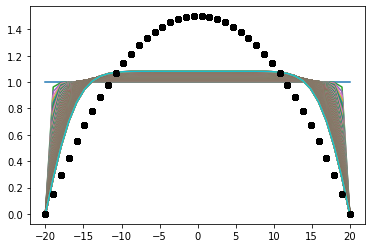

In [ ]:
!gcc -lm canal.c 
!./a.out
vx=np.loadtxt("canal.dat")
fig,ax=plt.subplots(1,1)
for i in range(Nx):
  ax.plot(ys,vx[i,:]);
  ax.plot(ys,vxs,'ko');